# 1. Camera operation

See ``Source/UnrealCV/Private/Commands/CameraHandler.h(.cpp)`` for more details.

``vget /camera/[id]/location``

(v0.2) Get camera location [x, y, z]

``vget /camera/[id]/rotation``

(v0.2) Get camera rotation [pitch, yaw, roll]

``vset /camera/[id]/location [x] [y] [z]``

(v0.2) Set camera location [x, y, z]

``vset /camera/[id]/rotation [pitch] [yaw] [roll]``

(v0.2) Set camera rotation [pitch, yaw, roll]``

``vget /camera/[id]/[viewmode]``

(v0.2) Get [viewmode] from the [id] camera, for example: vget /camera/0/depth

``vget /camera/[id]/[viewmode] [filename]``

(v0.2) Same as the above, with an extra parameter for filename

filename:	Filename is where the file will be stored.

example:	``vget /camera/0/lit lit.png``

``vget /camera/[id]/[viewmode] [format]``

(v0.3.7) Support binary data format

format:	If only file format is specified, the binary data will be returned through socket instead of being saved as a file.

example:	``vget /camera/0/lit png``

``vget /camera/[id]/object_mask``

(v0.2) The object mask is captured by first switching the viewmode to object_mask mode, then take a screenshot

``vset /viewmode [viewmode]``

(v0.2) Set ViewMode to (lit, normal, depth, object_mask)

``vget /viewmode``

(v0.2) Get current ViewMode

``vget /camera/[id]/pose``

(v0.3.10) Get camera location [x, y, z] and rotation [pitch, yaw, roll]

vset /camera/[id]/pose [x] [y] [z] [pitch] [yaw] [roll]

(v0.3.10) Teleport camera to location [x, y, z] and rotation [pitch, yaw, roll]

``vget /camera/[uint]/horizontal_fieldofview``

(v0.3.10) Get camera horizontal field of view

``vset /camera/[uint]/horizontal_fieldofview [FOV]``

(v0.3.10) Set camera horizontal field of view

``vget /camera/[uint]/vis_depth npy``

(v0.3.10)

``vget /camera/[uint]/plane_depth npy``

(v0.3.10)

# 2. Object interaction

See Source/UnrealCV/Private/Commands/ObjectHandler.h(.cpp) for more details

``vget /objects``

(v0.2) Get the name of all objects

``vget /object/[obj_name]/color``

(v0.2) Get the labeling color of an object (used in object instance mask)

``vset /object/[obj_name]/color [r] [g] [b]``

(v0.2) Set the labeling color of an object

``vset /object/[str]/show``

(v0.3.10) Show object

``vset /object/[str]/hide``

(v0.3.10) Hide object

# 3. Plugin commands

See Source/UnrealCV/Private/Commands/PluginHandler.h(.cpp) for more details.

``vget /unrealcv/status``

(v0.2) Get the status of UnrealCV plugin

``vget /unrealcv/help``

(v0.2) List all available commands and their help message

# 4. Action commands

See Source/UnrealCV/Private/Commands/ActionHandler.h(.cpp)

``vset /action/keyboard [key_name] [delta]``

(v0.3.6) Valid key_name can be found in here

``vset /action/game/pause``

(v0.3.10) Pause the game

``vset /action/game/level [level_name]``

(v0.3.10) Open a new level

``vset /action/input/enable``

(v0.3.10) Enable input

``vset /action/input/disable``

(v0.3.10) Disable input

``vset /action/eyes_distance [eye_distance]``

(v0.3.10) Set the eye distance between left eye and right eye (camera 1). This command might be marked as deprecated when we finish multiple camera support.

Run UE4 built-in commands

``vrun [cmd]``

(v0.3) This is a special command used to execute Unreal Engine built-in commands. UE4 provides some built-in commands for development and debug. They are not very well documented, but very useful.

A few examples are:

``stat FPS`` - show current frame rate

``shot`` - take a screenshot

``show Material`` - toggle the display of Material

These commands can be executed in the UE4 console. If you want to use them in UnrealCV, you can prefix these commands with vrun stat FPS.


In [1]:
import os, sys, time, re, json
import numpy as np
# from scipy import misc # for imread
# imread = misc.imread # use this instead of the imread in matplotlib
import cv2
imread = lambda x: cv2.imread(x)[:,:,(2,1,0)]

# Load matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import unrealcv as ucv
from unrealcv.util import read_png
from unrealcv import client

In [2]:
client.connect()

INFO:__init__:211:Got connection confirm: b'connected to clean_unrealcv'


True

In [3]:
client.request('vget /camera/0/location')

'463.513 41.133 50.432'

In [4]:
client.request('vget /camera/0/rotation')

'348.365 163.369 0.000'

In [5]:
client.request('vset /camera/0/rotation 0 0 0')

'ok'

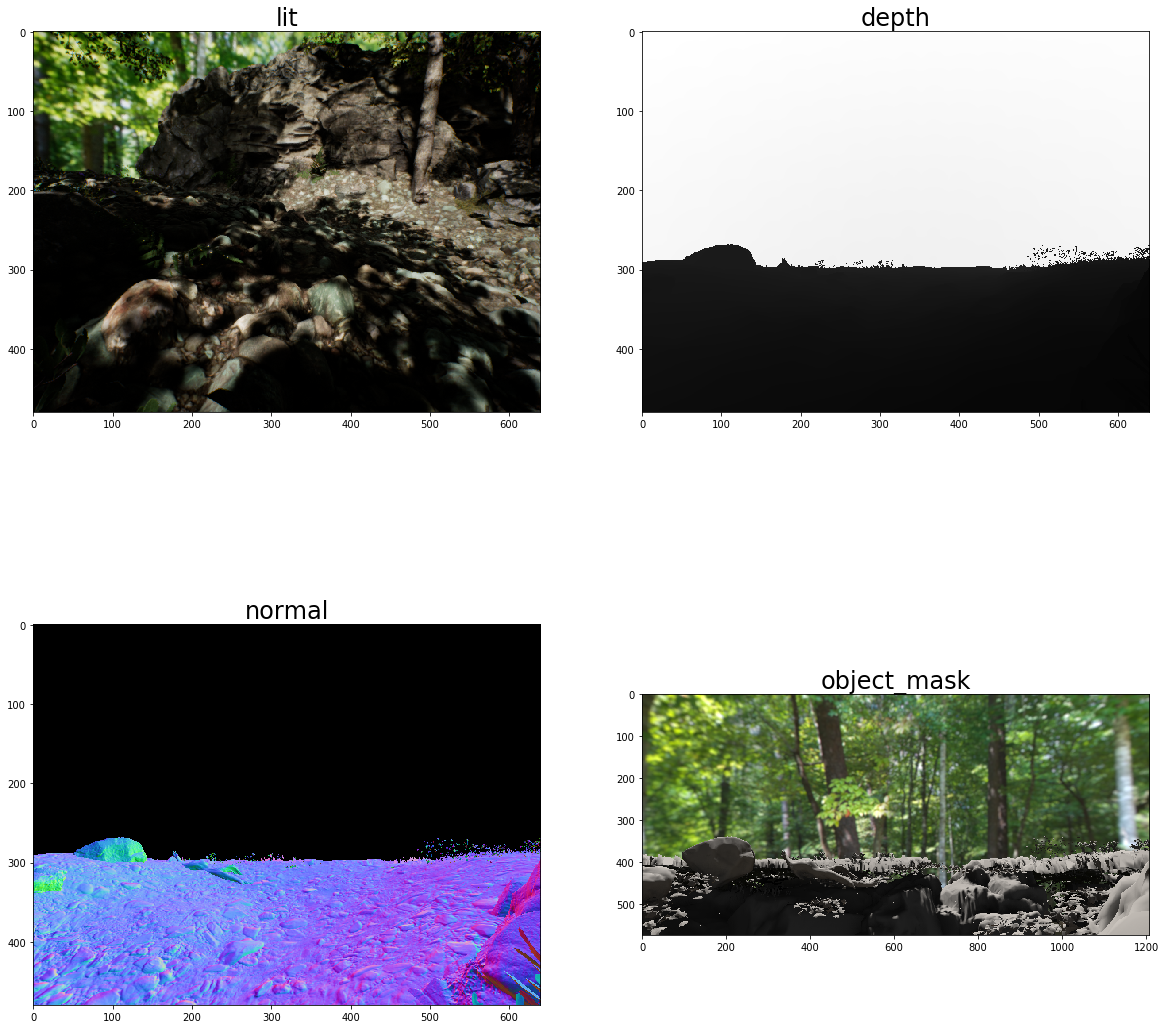

In [6]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title('lit', fontsize=24)
img = read_png(client.request('vget /camera/0/lit png'))
plt.imshow(img)
plt.subplot(222)
plt.title('depth', fontsize=24)
img = read_png(client.request('vget /camera/0/depth png'))
plt.imshow(img)
plt.subplot(223)
plt.title('normal', fontsize=24)
img = read_png(client.request('vget /camera/0/normal png'))
plt.imshow(img)
plt.subplot(224)
plt.title('object_mask', fontsize=24)
img = read_png(client.request('vget /camera/0/object_mask png'))
plt.imshow(img)